In [2]:
# Pandas and numpy for data manipulation
import pandas as pd
import numpy as np

# No warnings about setting value on copy of slice
pd.options.mode.chained_assignment = None

# For ignoring and non-display of warnings
import warnings 
warnings.filterwarnings('ignore')

# For estimations of different statistical models
import statsmodels.api as sm

# Display up to 60 columns of a dataframe
pd.set_option('display.max_columns', 60)

# Matplotlib visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.metrics import roc_auc_score,confusion_matrix,roc_curve,classification_report,accuracy_score,auc

In [3]:
df=pd.read_csv('Womens_Clothing_E_Commerce_Reviews.csv')

In [4]:
df.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               23486 non-null  int64 
 1   Clothing ID              23486 non-null  int64 
 2   Age                      23486 non-null  int64 
 3   Title                    19676 non-null  object
 4   Review Text              22641 non-null  object
 5   Rating                   23486 non-null  int64 
 6   Recommended IND          23486 non-null  int64 
 7   Positive Feedback Count  23486 non-null  int64 
 8   Division Name            23472 non-null  object
 9   Department Name          23472 non-null  object
 10  Class Name               23472 non-null  object
dtypes: int64(6), object(5)
memory usage: 2.0+ MB


In [6]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [7]:
df.shape

(23486, 10)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Clothing ID              23486 non-null  int64 
 1   Age                      23486 non-null  int64 
 2   Title                    19676 non-null  object
 3   Review Text              22641 non-null  object
 4   Rating                   23486 non-null  int64 
 5   Recommended IND          23486 non-null  int64 
 6   Positive Feedback Count  23486 non-null  int64 
 7   Division Name            23472 non-null  object
 8   Department Name          23472 non-null  object
 9   Class Name               23472 non-null  object
dtypes: int64(5), object(5)
memory usage: 1.8+ MB


# Analysis:

### 1.Describe the data
    Descriptive statistics, data type, etc.
    Analyze the text comment/ review and share the findings
### 2.Convert the ratings into 2 classes
    Class: Bad when Rating <=3
    Class: Good otherwise
### 3.Develop a model to predict the Rating class (created above)
    Focus on steps to build a model
###  4.Which algorithm can be used and why
### 5.Share the findings of the model.

# 1.Describe the data
Descriptive statistics, data type, etc.
Analyze the text comment/ review and share the findings

In [8]:
df.describe()

,Clothing ID,Age,Rating,Recommended IND,Positive Feedback Count
count,23486.000000,23486.000000,23486.000000,23486.000000,23486.000000
mean,918.118709,43.198544,4.196032,0.822362,2.535936
std,203.298980,12.279544,1.110031,0.382216,5.702202
min,0.000000,18.000000,1.000000,0.000000,0.000000
25%,861.000000,34.000000,4.000000,1.000000,0.000000
50%,936.000000,41.000000,5.000000,1.000000,1.000000
75%,1078.000000,52.000000,5.000000,1.000000,3.000000
max,1205.000000,99.000000,5.000000,1.000000,122.000000


In [9]:
df.describe(include='all')

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
count,23486.000000,23486.000000,19676,22641,23486.000000,23486.000000,23486.000000,23472,23472,23472
unique,NaN,NaN,13993,22634,NaN,NaN,NaN,3,6,20
top,NaN,NaN,Love it!,Perfect fit and i've gotten so many compliment...,NaN,NaN,NaN,General,Tops,Dresses
freq,NaN,NaN,136,3,NaN,NaN,NaN,13850,10468,6319
mean,918.118709,43.198544,NaN,NaN,4.196032,0.822362,2.535936,NaN,NaN,NaN
std,203.298980,12.279544,NaN,NaN,1.110031,0.382216,5.702202,NaN,NaN,NaN
min,0.000000,18.000000,NaN,NaN,1.000000,0.000000,0.000000,NaN,NaN,NaN
25%,861.000000,34.000000,NaN,NaN,4.000000,1.000000,0.000000,NaN,NaN,NaN
50%,936.000000,41.000000,NaN,NaN,5.000000,1.000000,1.000000,NaN,NaN,NaN
75%,1078.000000,52.000000,NaN,NaN,5.000000,1.000000,3.000000,NaN,NaN,NaN


In [15]:
df.Rating.value_counts()

5    13131
4     5077
3     2871
2     1565
1      842
Name: Rating, dtype: int64

<AxesSubplot:xlabel='Rating', ylabel='count'>

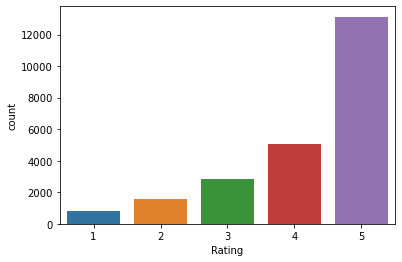

In [16]:
sns.countplot(x='Rating',data=df)

<AxesSubplot:>

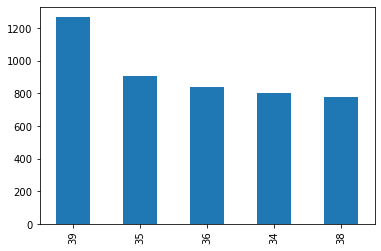

In [26]:
df.Age.value_counts().head().plot.bar()

<AxesSubplot:xlabel='Age', ylabel='Count'>

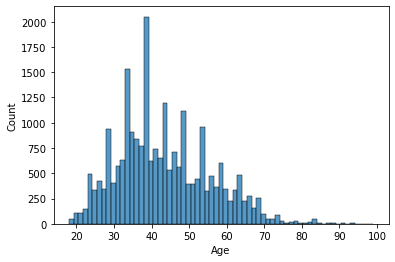

In [27]:
sns.histplot(x='Age',data=df)

# 2.Convert the ratings into 2 classes
Class: Bad when Rating <=3
Class: Good otherwise

In [28]:
def ratings(value):
    if value<=3:
        return 'Bad'
    else:
        return 'Good'

In [31]:
df.Rating= df.Rating.apply(ratings)

In [32]:
df.head()

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,Good,1,0,Initmates,Intimate,Intimates
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,Good,1,4,General,Dresses,Dresses
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,Bad,0,0,General,Dresses,Dresses
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",Good,1,0,General Petite,Bottoms,Pants
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,Good,1,6,General,Tops,Blouses


# 3.Develop a model to predict the Rating class (created above)¶
Focus on steps to build a model

In [33]:
df.isnull().sum()

Clothing ID                   0
Age                           0
Title                      3810
Review Text                 845
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                14
Department Name              14
Class Name                   14
dtype: int64

In [34]:
df.drop(['Title','Review Text'],axis=1,inplace=True)

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Clothing ID              23486 non-null  int64 
 1   Age                      23486 non-null  int64 
 2   Rating                   23486 non-null  object
 3   Recommended IND          23486 non-null  int64 
 4   Positive Feedback Count  23486 non-null  int64 
 5   Division Name            23472 non-null  object
 6   Department Name          23472 non-null  object
 7   Class Name               23472 non-null  object
dtypes: int64(4), object(4)
memory usage: 1.4+ MB


In [36]:
df.dropna(axis=0,inplace=True)

In [37]:
df.isnull().sum()

Clothing ID                0
Age                        0
Rating                     0
Recommended IND            0
Positive Feedback Count    0
Division Name              0
Department Name            0
Class Name                 0
dtype: int64

In [38]:
df.head()

,Clothing ID,Age,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,767,33,Good,1,0,Initmates,Intimate,Intimates
1,1080,34,Good,1,4,General,Dresses,Dresses
2,1077,60,Bad,0,0,General,Dresses,Dresses
3,1049,50,Good,1,0,General Petite,Bottoms,Pants
4,847,47,Good,1,6,General,Tops,Blouses


In [39]:
# For changing categorical to numerical
from sklearn.preprocessing import LabelEncoder

In [41]:
labelencoder = LabelEncoder()

cols = ['Rating','Division Name','Department Name', 'Class Name']

for col in cols:
    df[col] = labelencoder.fit_transform(df[col])

In [42]:
df.head()

,Clothing ID,Age,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,767,33,1,1,0,2,2,5
1,1080,34,1,1,4,0,1,3
2,1077,60,0,0,0,0,1,3
3,1049,50,1,1,0,1,0,13
4,847,47,1,1,6,0,4,0


In [43]:
from sklearn.model_selection import train_test_split
X=df.drop(["Rating"],axis=1)
y=df["Rating"]
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=.30,random_state=0)

In [44]:
from sklearn.linear_model import LogisticRegression

In [45]:
model=LogisticRegression(solver="liblinear")
model.fit(x_train,y_train)
print('Training score =', model.score(x_train, y_train))
print('Test score =', model.score(x_test, y_test))

Training score = 0.9356664637857578
Test score = 0.9382277761999432


In [46]:
train = []
test = []
def model_fit(algo,X_train,y_train,X_test,y_test):
  algo.fit(X_train,y_train)
  y_train_pred=algo.predict(X_train)
  y_train_prob=algo.predict_proba(X_train)[:,1]
  print("auc score of train data",roc_auc_score(y_train,y_train_prob))
  train.append(roc_auc_score(y_train,y_train_prob))

  y_test_pred=algo.predict(X_test) #ML
  y_test_prob=algo.predict_proba(X_test)[:,1] 
  print("auc score of test data",roc_auc_score(y_test,y_test_prob))
  test.append(roc_auc_score(y_test,y_test_prob))
  print("confusion_matrix",confusion_matrix(y_test,y_test_pred))
  print("classification_report")
  print(classification_report(y_test,y_test_pred))
  fpr,tpr,thresholds=roc_curve(y_test,y_test_prob)
  
  roc_auc = auc(fpr, tpr)
  print("roc_auc",roc_auc)
  GINI = (2 * roc_auc) - 1
  print("GINI",GINI)
  plt.plot(fpr,tpr)
  plt.plot(fpr,fpr)
  plt.xlabel("FPR")
  plt.ylabel("TPR")
 

auc score of train data 0.8712472496349619
auc score of test data 0.8733767397638487
confusion_matrix [[1186  370]
 [  65 5421]]
classification_report
              precision    recall  f1-score   support

           0       0.95      0.76      0.85      1556
           1       0.94      0.99      0.96      5486

    accuracy                           0.94      7042
   macro avg       0.94      0.88      0.90      7042
weighted avg       0.94      0.94      0.94      7042

roc_auc 0.8733767397638487
GINI 0.7467534795276973


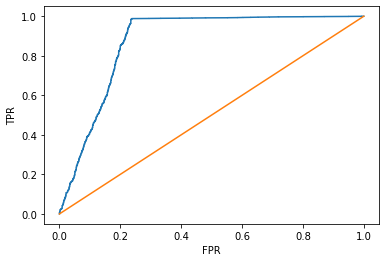

In [50]:
lr = LogisticRegression()
model_fit(lr,x_train,y_train,x_test,y_test)